### In this Jupyter file We will make a machine learning classification based model to Chunk


##### For `Exploratory Data Analysis (EDA)` open  `analysis.ipynb` file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from steps.plot import circle_draw,bar_plot
from steps.preprocess import missing_value,numerical_conversion,binary_conversion,standard_scaling
from steps.training import model_training
from steps.evaluation import evaluate

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

Pandas has a built-in function to read .csv files called read_csv() which takes the file pathname of your .csv file. You'll likely use this a lot.

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Let's see how's our data look like

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Let's do Data Exploration

In [4]:
data.shape

(7043, 21)

In [5]:
data.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Let's do preproceesing

### Find whether we have missing values or not

In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# This function will drop all the missing value if it has
missing_value(data=data)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


#### Lets Convert the object to integer

As we know we need to convert object datatype to integer for training the model we need our data in numerical format

We can do `one-hot` or `label encoding`

Here we are going with `label encoding`

In [9]:
# Print the column which are object database
for col in data.columns:
    if data[col].dtypes == 'object':
        print(col)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [10]:
# Let's convert Basic Affirmation in our data into Binary format
binary_conversion(data=data)

In [11]:
# Let's convert rest object datatype into numerical form
numerical_conversion(data=data)

#### Normalization Technique - `StandardScaling` here we used this normalization technique , we can also used `MinMaxScaleing`

In [ ]:
standard_scaling(data=data)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int64  


#### Lets do upsampling as there is lot of difference in Churn Yes and No it is done to remove baisness


In [13]:
data['Churn'].value_counts()


0    5174
1    1869
Name: Churn, dtype: int64

In [14]:
majority_class = data[data['Churn'] == 0]
minority_class = data[data['Churn'] == 1]
minority_class_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
data = pd.concat([majority_class, minority_class_upsampled])

#### Now the 1 and 0 are in equal amount

In [15]:
# len(minority_class),len(majority_class),len(minority_class_upsampled)
# minority_class_upsampled['Churn'].value_counts()
data['Churn'].value_counts()
# minority_class['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [16]:
# Let's split it into X and y
X = data.drop(columns='Churn',axis=1)
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,2,29.85,2505
1,3962,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,3,56.95,1466
3,5535,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,0,42.30,1400
6,1002,1,0,0,1,22,1,1,2,0,1,0,0,1,0,0,1,1,89.10,1550
7,4770,0,0,0,0,10,0,2,1,1,0,0,0,0,0,0,0,3,29.75,2609


In [17]:
y = data['Churn']

### Train test splitting

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (8278, 20) Target: (8278,)
Testing set - Features: (2070, 20) Target: (2070,)


### Model Training

In [19]:
model_training(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

c:\Users\Amit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7570048309178744,
 'Decision Tree': 0.8893719806763285,
 'Random Forest': 0.9135265700483092,
 'Gradient Boosting': 0.8014492753623188,
 'SVM': 0.5743961352657004,
 'K-Nearest Neighbors': 0.6714975845410628,
 'Naive Bayes': 0.7333333333333333}

In [20]:
model_score = model_training(X_train,X_test,y_train,y_test)
model_score

c:\Users\Amit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7570048309178744,
 'Decision Tree': 0.8893719806763285,
 'Random Forest': 0.9135265700483092,
 'Gradient Boosting': 0.8014492753623188,
 'SVM': 0.5743961352657004,
 'K-Nearest Neighbors': 0.6714975845410628,
 'Naive Bayes': 0.7333333333333333}

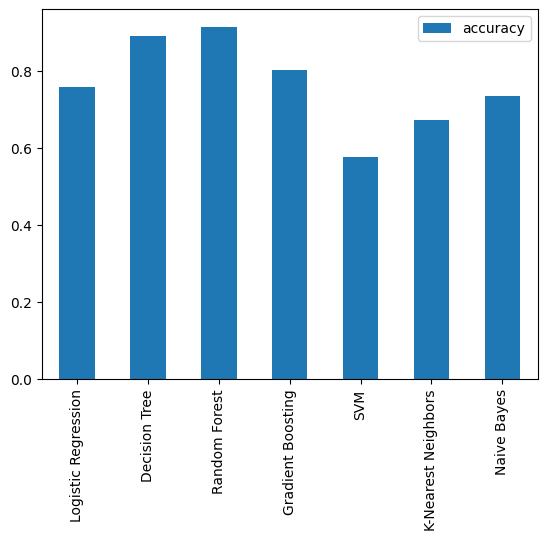

In [21]:
### Model Comparision
model_compare=pd.DataFrame(model_score, index=["accuracy"])
# model_compare.plot.bar(); # give close bar to each other try it
model_compare.T.plot.bar();
plt.xticks(rotation=90);

### Our best Model is `Random Forest` with `91.3%` accuracy

In [22]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

## Let's do the Evaluation of the model

In [23]:
model.score(X_test,y_test)

0.9159420289855073

In [24]:
y_pred = model.predict(X_test)

In [25]:
evaluate(y_test=y_test,y_pred=y_pred)

Accuracy: 0.9159
Precision: 0.8743
Recall: 0.9698
F1-score: 0.9196


## HyperTuning

Our Model Random-Forest gives the accuracy for `91.5%` so if we want to increase its accuracy we can do Hypertuning .First we try with `RandomSearch CV` then `GridSearch CV` let's see which give more best result

In [26]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# import numpy as np


# # Create hyperparameter grid for RandomForestClassifier
# rf_grid = {"n_estimators":np.arange(10,1000,20),
#            "max_depth":[None,3,5,10],
#            "min_samples_split":np.arange(2,20,2),
#            "min_samples_leaf":np.arange(1,20,2)}

In [27]:
# np.random.seed(42)

# # Setup random hyperparameter search for LogisticRegression
# rs_log_reg=RandomizedSearchCV(RandomForestClassifier(),
#                               param_distributions=rf_grid,
#                               cv=10,
#                               n_iter=20,
#                               verbose=True)

# # Fit the random hyperparameter search model For logisticregression
# rs_log_reg.fit(X_train,y_train)

In [29]:
# gs_log_reg = GridSearchCV(RandomForestClassifier(),
#                          param_grid=rf_grid,
#                          cv=2,
#                          verbose=True)

# # Fit the model
# gs_log_reg.fit(X_train,y_train)

### Export the model